In [27]:
import pandas as pd
import numpy as np

run_model_data = pd.read_csv("Bank_Reserves_Bias_iter_1000_steps_500_fix.csv")

run_model_data

,id,init_people,trade_threshold,Run,Gini,Middle Class,Poor,Rich,rich_threshold,reserve_percent
0,0,25,0,0,0.436103,17,3,4,10,5
1,1,25,0,1,0.556226,14,2,9,10,5
2,2,25,0,2,0.498128,15,1,8,10,5
3,3,25,0,3,0.550634,13,3,8,10,5
4,4,25,0,4,0.469126,13,1,10,10,5
...,...,...,...,...,...,...,...,...,...,...
5995,5995,100,20,5995,0.670054,24,30,45,10,5
5996,5996,100,20,5996,0.653935,17,33,48,10,5
5997,5997,100,20,5997,0.662621,20,34,45,10,5
5998,5998,100,20,5998,0.661458,21,32,43,10,5


Código para re-processar os gráficos

In [ ]:
import matplotlib.plot as plt
import os

run_model_data.drop(columns=["Standart Deviation Money"], inplace=True)

fixed_params = {
  "rich_threshold": 10,
  "reserve_percent": 5, 
}

variable_params = {
  "init_people": [25, 100],
  "trade_threshold": [0, 10, 20]
  # "init_people": [25],
  # "trade_threshold": [10]
}  

for people in variable_params["init_people"]:
  for trade in variable_params["trade_threshold"]:
    df = run_model_data[(run_model_data.init_people == people) & (run_model_data.trade_threshold == trade)]
    # df['Standart Deviation Money'] = df['Standart Deviation Money'].astype(float)
    df['Gini'] = df['Gini'].astype(float)

    plt.clf()
    plt.hist(df.Gini, edgecolor='black', bins=15)
    try: os.mkdir("images")
    except FileExistsError: pass
    plt.savefig("images" + os.sep + f"Gini_people-{people}_trade-{trade}.png")

In [6]:
run_model_data.drop(columns=["Standart Deviation Money"], inplace=True)
run_model_data.rename(columns={"":"id"}, inplace=True)
run_model_data.to_csv("Bank_Reserves_Bias_iter_1000_steps_500_fix.csv", index=False)

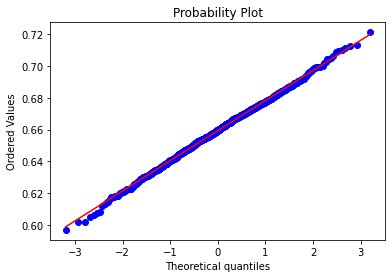

In [30]:
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

df = run_model_data[(run_model_data.init_people == 100) & (run_model_data.trade_threshold == 20)]
# mean = np.mean(df.Gini)
# np.std(df.Gini*(1/mean)) #, edgecolor='black', bins=15)

measurements = df.Gini 
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [31]:
variable_params = {
  "init_people": [25, 100],
  "trade_threshold": [0, 10, 20]
  # "init_people": [25],
  # "trade_threshold": [10]
}  

for people in variable_params["init_people"]:
  for trade in variable_params["trade_threshold"]:
    df = run_model_data[(run_model_data.init_people == people) & (run_model_data.trade_threshold == trade)]
    # df['Standart Deviation Money'] = df['Standart Deviation Money'].astype(float)

    print(people, trade, np.mean(df.Gini))

25 0 0.529895816651653
25 10 0.599791612887847
25 20 0.6244046214949278
100 0 0.5875099515108263
100 10 0.631814362573647
100 20 0.6593093099057232
